In [42]:
import pandas as pd
import time
from sklearn import metrics

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import KFold, GridSearchCV

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')
sns.set_style('white')

In [20]:
df_train_copy = pd.read_csv('../datasets/raw_datasets/df_train_copy_preprocessed.csv')
df_test = pd.read_csv('../datasets/raw_datasets/df_test_preprocessed.csv')
X_train = pd.read_csv('../datasets/raw_datasets/X_train.csv')
X_val = pd.read_csv('../datasets/raw_datasets/X_val.csv')
y_train = pd.read_csv('../datasets/raw_datasets/y_train.csv')
y_val = pd.read_csv('../datasets/raw_datasets/y_val.csv')

In [21]:
# Training Features
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group',
       'Cabin_number', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']

In [22]:
# Define hyperparameter grids for each model
param_grids = {
    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
        'max_depth': [3, 5, 8]
    },
    "AdaBoostClassifier": {
        'n_estimators': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2]
    },
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [3, 5, 8, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "BaggingClassifier": {
        'n_estimators': [50, 100, 150, 200],
        'max_samples': [0.5, 0.7, 0.9],
        'max_features': [0.5, 0.7, 0.9],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
        'max_depth': [3, 5, 8]
    },
    "LGBMClassifier": {
        'n_estimators': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
        'max_depth': [3, 5, 8],
        'verbose': [0]
    },
    "CatBoostClassifier": {
        'iterations': [50, 100, 150, 200, 300, 400],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
        'depth': [3, 5, 8],
        'verbose': [False] 
    }
}

# Splitting data for cross-validation using KFold splitting
kf = KFold(n_splits=10, shuffle=True, random_state=619)


In [23]:
# create table to store results of GridSearchCV
results_columns = ['Model', 'Best Params', 'Best Score', 'Best Model', 'Refit Time']
results_df = pd.DataFrame(columns = results_columns)

In [24]:
# Perform hyperparameter tuning for each model and store results row wise
total_start_time = time.time()

index = 0

for model, param_grid in param_grids.items():
    
    # Instantiate model from string name
    model = eval(model)()

    start_time = time.time()
    search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=kf, verbose=1, n_jobs=-1)
    search.fit(df_train_copy[features], df_train_copy["Transported"])
    end_time = time.time()
    
    # Store results
    results_df.loc[index, 'Model'] = model.__class__.__name__
    results_df.loc[index, 'Best Params'] = str(search.best_params_)
    results_df.loc[index, 'Best Model'] = str(search.best_estimator_)
    results_df.loc[index, 'Best Score'] = search.best_score_
    results_df.loc[index, 'Refit Time'] = search.refit_time_
    results_df.loc[index, 'Total Model Grid Search Tuning Time'] = end_time - start_time

    index = index + 1

total_end_time = time.time()

total_run_time = total_end_time - total_start_time
print('Total time taken by Hyperparameter tuning is {:.2f} minutes.'.format(total_run_time/60))

# Print the model results in descending order to get the best performing model
results_df.sort_values('Best Score', ascending = False, inplace = True)
results_df

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


Fitting 10 folds for each of 36 candidates, totalling 360 fits


/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R alg

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning]

/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Total time taken by Hyperparameter tuning is 123.92 minutes.


Model  \
6          CatBoostClassifier   
5              LGBMClassifier   
4               XGBClassifier   
0  GradientBoostingClassifier   
2      RandomForestClassifier   
3           BaggingClassifier   
1          AdaBoostClassifier   

                                         Best Params Best Score  \
6  {'depth': 5, 'iterations': 200, 'learning_rate...   0.906611   
5  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   0.904083   
4  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   0.903727   
0  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...   0.903397   
2  {'bootstrap': True, 'max_depth': None, 'min_sa...   0.895921   
3  {'bootstrap': True, 'bootstrap_features': Fals...   0.892373   
1        {'learning_rate': 0.2, 'n_estimators': 400}   0.886084   

                                          Best Model Refit Time  \
6  <catboost.core.CatBoostClassifier object at 0x...   0.827068   
5  LGBMClassifier(max_depth=3, n_estimators=300, ...   0.332428   
4  XGBClassifier(base_score=None, booster=None, c...   4.657731   
0  GradientBoostingClassifier(learning_rate=0.05,...   8.580551   
2  RandomForestClassifier(min_samples_leaf=4, n_e...   1.917239   
3  BaggingClassifier(max_features=0.9, max_sample...   3.859369   
1  AdaBoostClassifier(learning_rate=0.2, n_estima...     3.9141   

   Total Model Grid Search Tuning Time  
6                          1993.456288  
5                          2342.552601  
4                           115.435680  
0                          1314.691698  
2                           529.563700  
3                           998.862599  
1                           140.370896

Text(0, 0.5, 'Algorithm')

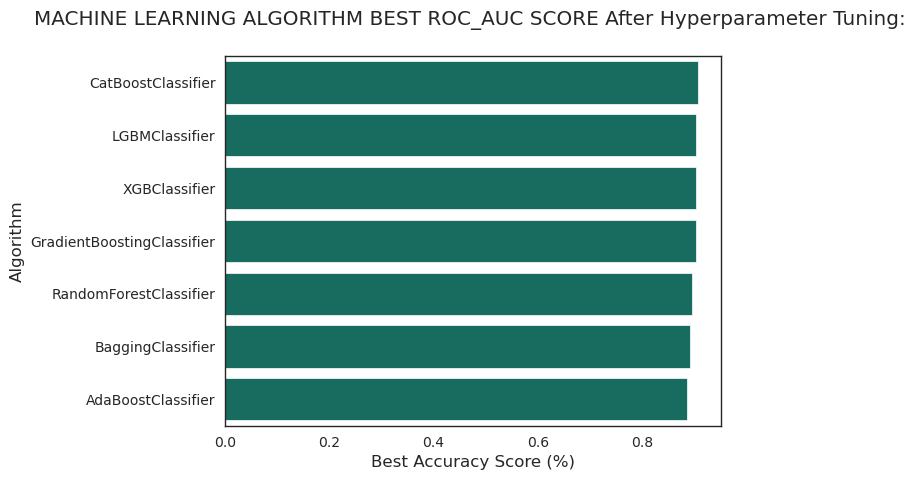

In [39]:
sns.barplot(x='Best Score', y = 'Model', data = results_df, color = "#097969")

plt.title('MACHINE LEARNING ALGORITHM BEST ROC_AUC SCORE After Hyperparameter Tuning: \n')
plt.xlabel('Best Accuracy Score (%)')
plt.ylabel('Algorithm')

In [26]:
# Save results in csv files:
#results_df.to_csv('../datasets/raw_datasets/results_df.csv', index=False)

In [31]:
# results_df["Best Model"]

6    <catboost.core.CatBoostClassifier object at 0x...
5    LGBMClassifier(max_depth=3, n_estimators=300, ...
4    XGBClassifier(base_score=None, booster=None, c...
0    GradientBoostingClassifier(learning_rate=0.05,...
2    RandomForestClassifier(min_samples_leaf=4, n_e...
3    BaggingClassifier(max_features=0.9, max_sample...
1    AdaBoostClassifier(learning_rate=0.2, n_estima...
Name: Best Model, dtype: object

In [40]:
compare_columns = ['Model','Mean Model Train Accuracy', 'Mean Model Test Accuracy']
model_compare = pd.DataFrame(columns = compare_columns)

index = 0

# Iterate over each row in results_df
for _, row in results_df.iterrows():
    
    model_compare.loc[index, 'Model'] = row['Model']

    # Convert string back to dictionary
    best_params = eval(row['Best Params'])

    # Dynamically instantiate the model class
    best_model = eval(row['Model'])(**best_params)
    
    best_model.fit(X_train, y_train)
    
    # Make predictions

    pred_train = best_model.predict(X_train)
    pred_test = best_model.predict(X_val)

    score_train = metrics.accuracy_score(y_train, pred_train)
    score_test = metrics.accuracy_score(y_val, pred_test)

    model_compare.loc[index, 'Best Params'] = results_df.loc[index, 'Best Params']
    model_compare.loc[index, 'Mean Model Train Accuracy'] = score_train
    model_compare.loc[index, 'Mean Model Test Accuracy'] = score_test

    index = index + 1

model_compare.sort_values('Mean Model Test Accuracy', ascending = False, inplace = True)
model_compare


/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/ut

Model Mean Model Train Accuracy  \
0          CatBoostClassifier                  0.858643   
4      RandomForestClassifier                  0.912137   
1              LGBMClassifier                  0.853609   
2               XGBClassifier                  0.849295   
3  GradientBoostingClassifier                  0.896175   
5           BaggingClassifier                  0.968651   
6          AdaBoostClassifier                  0.809606   

  Mean Model Test Accuracy                                        Best Params  
0                 0.818861  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...  
4                 0.817711  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...  
1                 0.813686        {'learning_rate': 0.2, 'n_estimators': 400}  
2                 0.812536  {'bootstrap': True, 'max_depth': None, 'min_sa...  
3                 0.807361  {'bootstrap': True, 'bootstrap_features': Fals...  
5                 0.807361  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
6                  0.79701  {'depth': 5, 'iterations': 200, 'learning_rate...

In [43]:
# Extract the best models from results_df
best_models = []
for _, row in results_df.iterrows():
    # Convert string back to dictionary
    best_params = eval(row['Best Params'])
    # Dynamically instantiate the model class
    best_model = eval(row['Model'])(**best_params)
    best_models.append((row['Model'], best_model))

# Define the voting classifiers
hard_voting_clf = VotingClassifier(estimators=best_models, voting='hard')
soft_voting_clf = VotingClassifier(estimators=best_models, voting='soft')

# Train the voting classifiers
hard_voting_clf.fit(X_train, y_train)
soft_voting_clf.fit(X_train, y_train)

# Evaluate the performance of the voting classifiers
hard_voting_train_score = hard_voting_clf.score(X_train, y_train)
hard_voting_test_score = hard_voting_clf.score(X_val, y_val)

soft_voting_train_score = soft_voting_clf.score(X_train, y_train)
soft_voting_test_score = soft_voting_clf.score(X_val, y_val)

print("Hard Voting Train Accuracy:", hard_voting_train_score)
print("Hard Voting Test Accuracy:", hard_voting_test_score)

print("Soft Voting Train Accuracy:", soft_voting_train_score)
print("Soft Voting Test Accuracy:", soft_voting_test_score)

/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Hard Voting Train Accuracy: 0.8780557952257694
Hard Voting Test Accuracy: 0.8182863714778609
Soft Voting Train Accuracy: 0.8984756974403221
Soft Voting Test Accuracy: 0.8131109833237493
